# HW5- Opal Issan

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'serif',
        'size'   : 15}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

In [3]:
# training data
data3_train = np.loadtxt('train3.txt', float)
data5_train = np.loadtxt('train5.txt', float)

x = np.zeros((700*2, 64))
x[:700, :] = data3_train
x[700:, :] = data5_train

In [4]:
# 800 IMAGES, OF SIZE 8x8.
np.shape(x)

(1400, 64)

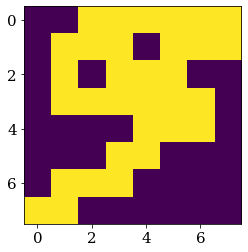

In [5]:
plt.imshow(np.reshape(x[0, :], (8,8), order="A"))

### *5.4 (a)* I use gradient ascent to learn the weights that maximize the log-likelihood. 

In [6]:
def sigmoid(z):
    return 1./(1.+np.exp(-z))

def get_label(ii):
    if ii >= np.shape(x)[0]/2: 
        return 1
    elif ii < np.shape(x)[0]/2:
        return 0 

def gradient(w, x):
    G = np.zeros(len(w))
    for ii in range(np.shape(x)[0]):
        G += (get_label(ii) - sigmoid(np.dot(w, x[ii, :]))) * x[ii, :]
    return G

def log_likelihood(w, x):
    L = 0
    for ii in range(np.shape(x)[0]):
        L += get_label(ii)*np.log(sigmoid(np.dot(w, x[ii, :]))) + \
        (1-get_label(ii))*np.log(sigmoid(np.dot(-w, x[ii, :])))
    return L

def percent_error_rate(w, x):
    incorrect = 0 
    for ii in range(np.shape(x)[0]):
        if ii < np.shape(x)[0]/2:
            if sigmoid(np.dot(w, x[ii, :])) > 0.5:
                incorrect +=1
        elif ii >= np.shape(x)[0]/2:
            if sigmoid(np.dot(w, x[ii, :])) < 0.5:
                incorrect +=1
    return incorrect/ (np.shape(x)[0])

In [9]:
# number of iterations of gradient ascent. 
iterations = 10000

# save log-likelihood at each iteration. 
log_likelihood_res = np.zeros(iterations)
percent_error_res = np.zeros(iterations)
# initialize weights and eta. 
eta = 0.2/np.shape(x)[0]
w = np.zeros(np.shape(x)[1])

for ii in range(iterations):
    # keep track of performance
    # save the log-likelihood at each iteration
    log_likelihood_res[ii] = log_likelihood(w=w, x=x)
    # save the perect error at each iteration
    percent_error_res[ii] = percent_error_rate(w=w, x=x)
    # using gradient ascent
    w += eta * gradient(w=w, x=x)
    
    if ii % 500==0:
        print("log-likelihood at iteration #" + str(ii)+ " is " + str(log_likelihood_res[ii]))

log-likelihood at iteration #0 is -970.4060527838883
log-likelihood at iteration #500 is -206.36969116997165
log-likelihood at iteration #1000 is -187.17222055306516
log-likelihood at iteration #1500 is -179.03033909204663
log-likelihood at iteration #2000 is -174.32142559260697
log-likelihood at iteration #2500 is -171.22136555217975
log-likelihood at iteration #3000 is -169.0329746770957
log-likelihood at iteration #3500 is -167.4187014654701
log-likelihood at iteration #4000 is -166.1908343353282
log-likelihood at iteration #4500 is -165.2353163155186
log-likelihood at iteration #5000 is -164.47844747761206
log-likelihood at iteration #5500 is -163.870376647684
log-likelihood at iteration #6000 is -163.37615821881974
log-likelihood at iteration #6500 is -162.97057987463626
log-likelihood at iteration #7000 is -162.63501528405482
log-likelihood at iteration #7500 is -162.3554283516989
log-likelihood at iteration #8000 is -162.12106325579612
log-likelihood at iteration #8500 is -161.9

In [10]:
print("weights =")
print(np.reshape(w, (8, 8), order="A"))

weights =
[[-0.84581986 -1.58050045 -1.15491987 -1.31845115 -0.67734112 -0.99723028
   0.80192891  1.84220214]
 [-0.08023175 -0.1847138   0.27406507 -0.06067117 -0.52813383  0.85794474
  -1.38260715 -1.38737182]
 [ 3.90558599  1.37214239  1.50591627  0.14575206  0.83986237 -2.21240528
  -2.42353863 -2.70871098]
 [ 0.7642044   0.36644125  0.69652019 -0.34063136 -0.47432392 -2.5232365
   0.46273175 -0.04146346]
 [ 0.5715988   1.19892352  0.07270174 -0.39995368 -0.64623714 -0.10111764
  -0.55497539 -0.19510053]
 [ 1.24156706 -0.24537015 -0.36644999 -0.16545842  0.02880456 -1.01372579
   0.92393507 -1.67733118]
 [ 1.57062766 -0.70931049  1.34709236  0.64379676  0.48911144 -0.40246843
   0.16835328 -1.43632466]
 [ 0.63984859  0.29591866  0.904295    2.17697721  0.47916827  0.67664048
   0.7592539  -0.53900548]]


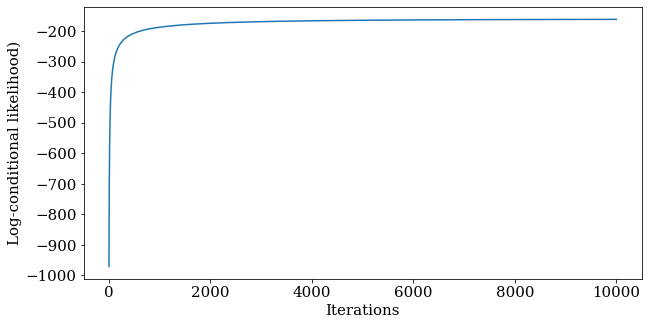

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(log_likelihood_res)
ax.set_ylabel("Log-conditional likelihood)", fontsize=15)
ax.set_xlabel("Iterations", fontsize=15)
plt.savefig("log_likelihood.png", dpi=500)

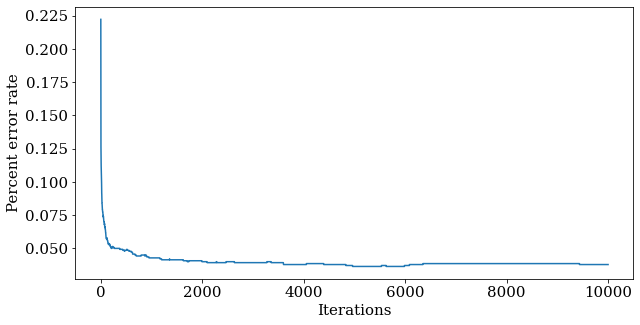

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(percent_error_res[1:])
ax.set_ylabel("Percent error rate", fontsize=15)
ax.set_xlabel("Iterations", fontsize=15)
plt.savefig("percent_error.png", dpi=500)

In [13]:
print("the training percent error in the last iteration is = ", percent_error_res[-1])

the training percent error in the last iteration is =  0.03785714285714286


### *5.4 (b)* The percent error rate on the testing data is 0.06

In [16]:
# testing data
data3_test = np.loadtxt('test3.txt', float)
data5_test = np.loadtxt('test5.txt', float)

x_test = np.zeros((800, 64))
x_test[:400, :] = data3_test
x_test[400:, :] = data5_test

In [17]:
percent_error_rate(w=w, x=x_test)

0.06125